# Hands-on tutorial for DeiT

In this notebook, we show how to use the pre-trained models that we provide with torchhub to perform predictions

## Preliminaries

This section contains the necessary imports, installs and downloads necessary for the remaining of this notebook.

In [1]:
!pip install torch==1.13.1 torchvision==0.14.1 timm==0.6.12

# Download ImageNet category names for nicer display
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.5 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.3.1+cu121
    Uninstalling torch-2.3.1+cu121:
      Successfully uninstalled torch-2.3.1+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.18.1+cu121
    Uninstalling torchvision-0.18.1+cu121:
      Successfully uninstalled torchvision-0.18.1+cu121
ERROR: pip's dependency resolver does not currently take into account all the pac

In [2]:
from PIL import Image
import requests
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import torch
import timm
import torchvision
import torchvision.transforms as T

from timm.data.constants import IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD

torch.set_grad_enabled(False);

In [3]:
# Read the ImageNet categories
with open("imagenet_classes.txt", "r") as f:
    imagenet_categories = [s.strip() for s in f.readlines()]

In [4]:
# create the data transform that DeiT expects
transform = T.Compose([
    T.Resize(256, interpolation=3),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD),
])

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/transforms.py:329: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


## Using a pre-trained model from TorchHub

In this section, we show how to load a pre-trained models from torchhub and perform inference with it. In here we will use DeiT-base, but you can use any other model that we provide.

In [5]:
model = torch.hub.load('facebookresearch/deit:main', 'deit_base_patch16_224', pretrained=True)
model.eval();

Downloading: "https://github.com/facebookresearch/deit/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://dl.fbaipublicfiles.com/deit/deit_base_patch16_224-b5f2ef4d.pth" to /root/.cache/torch/hub/checkpoints/deit_base_patch16_224-b5f2ef4d.pth


  0%|          | 0.00/330M [00:00<?, ?B/s]

Let's now retrieve an image from a url and return it as a PIL Image

In [17]:
url = 'https://picsum.photos/200/300' # random photo generater api by picsum
im = Image.open(requests.get(url, stream=True).raw)

Let's see what the image looks like

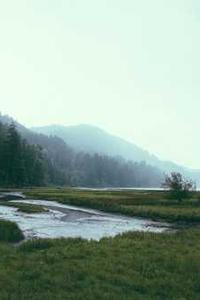

In [18]:
im

Next, we apply the preprocessing that DeiT expects during inference and run it through the model, computing the 5 classes with highest confidence.

In [19]:
# transform the original image and add a batch dimension
img = transform(im).unsqueeze(0)

# compute the predictions
out = model(img)

# and convert them into probabilities
scores = torch.nn.functional.softmax(out, dim=-1)[0]

# finally get the index of the prediction with highest score
topk_scores, topk_label = torch.topk(scores, k=5, dim=-1)

for i in range(5):
  pred_name = imagenet_categories[topk_label[i]]
  print(f"Prediction index {i}: {pred_name:<25}, score: {topk_scores[i].item():.3f}")

Prediction index 0: valley                   , score: 0.746
Prediction index 1: lakeside                 , score: 0.079
Prediction index 2: alp                      , score: 0.043
Prediction index 3: dam                      , score: 0.013
Prediction index 4: mountain bike            , score: 0.003
